In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [52]:
%store -r X_sampled
%store -r data
%store -r Y_sampled

In [53]:
X = X_sampled
Y = Y_sampled

In [54]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [55]:
X_normalized = normalize(X)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_normalized)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['C1', 'C2']
X_pca

,C1,C2
0,0.051161,-0.177468
1,0.251595,0.125244
2,-0.184033,0.196109
3,-0.164492,-0.064214
4,-0.098884,-0.234897
...,...,...
9995,0.337460,-0.029048
9996,-0.117723,-0.044262
9997,-0.000966,-0.213062
9998,-0.189860,-0.103881


In [56]:
knn = NearestNeighbors(n_neighbors = 4).fit(X)
neigh_dist, neigh_ind = knn.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

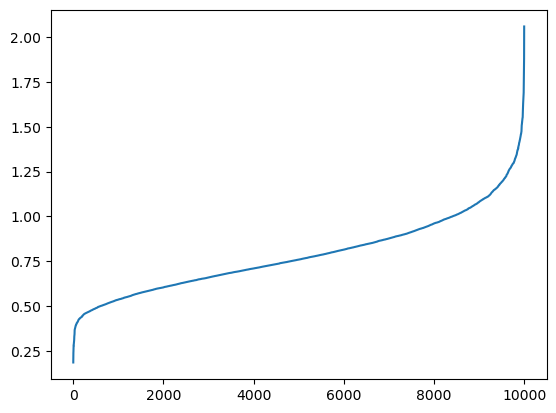

In [57]:
k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.show()

In [58]:
knee = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online = True)
print(knee.knee_y)
eps = knee.knee_y

1.5227335011744518


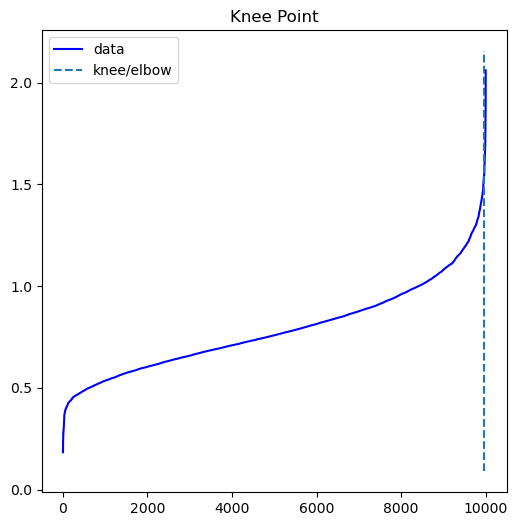

In [59]:
knee.plot_knee()
plt.show()

In [60]:
db = DBSCAN(eps = eps, min_samples = 4).fit(X)

In [67]:
print(set(db.labels_))
Counter(db.labels_) # value of -1 represents noise
print(silhouette_score(X, db.labels_))
%store db

{0, 1, 2, 3, -1}
0.1166301519516847
Stored 'db' (DBSCAN)


<AxesSubplot:xlabel='C1', ylabel='C2'>

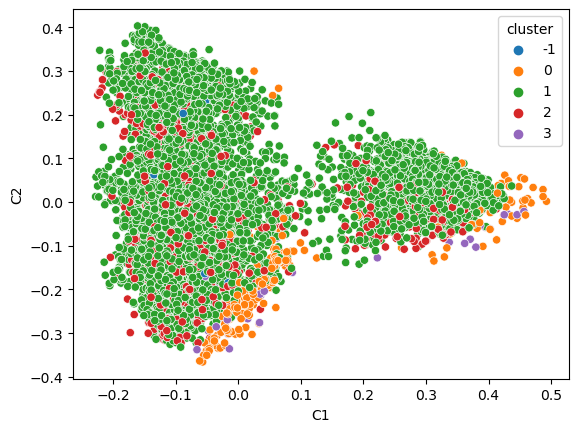

In [62]:
X_pca['cluster'] = pd.Categorical(db.labels_)
sns.scatterplot(x = "C1", y = "C2", hue = "cluster", data = X_pca)

In [63]:
best_score = float('-inf')
best_model = None
eps_values = [0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 1.9, 2, 2.5, 3, 4]

for eps in eps_values:
    for min_samples in range(2, 11):
        model = DBSCAN(eps = eps, min_samples = min_samples)
        
        model.fit(X)
        
        if(len(set(model.labels_)) == 1 or len(set(model.labels_)) > 4):
            continue
        
        score = silhouette_score(X, model.labels_)
            
        if score > best_score:
            best_score = score
            best_model = model
        
        print(f'{min_samples}, {eps} -> {score}')

2, 1.8 -> 0.2522647462354799
3, 1.8 -> 0.2522647462354799
4, 1.8 -> 0.2522647462354799
5, 1.8 -> 0.2522647462354799
6, 1.8 -> 0.2522647462354799
7, 1.8 -> 0.2522647462354799
8, 1.8 -> 0.2522647462354799
9, 1.8 -> 0.2522647462354799
10, 1.8 -> 0.2522647462354799
2, 1.9 -> 0.2522647462354799
3, 1.9 -> 0.2522647462354799
4, 1.9 -> 0.2522647462354799
5, 1.9 -> 0.2522647462354799
6, 1.9 -> 0.2522647462354799
7, 1.9 -> 0.2522647462354799
8, 1.9 -> 0.2522647462354799
9, 1.9 -> 0.2522647462354799
10, 1.9 -> 0.2522647462354799


In [64]:
print(best_score)
print(best_model)

0.2522647462354799
DBSCAN(eps=1.8, min_samples=2)


<AxesSubplot:xlabel='C1', ylabel='C2'>

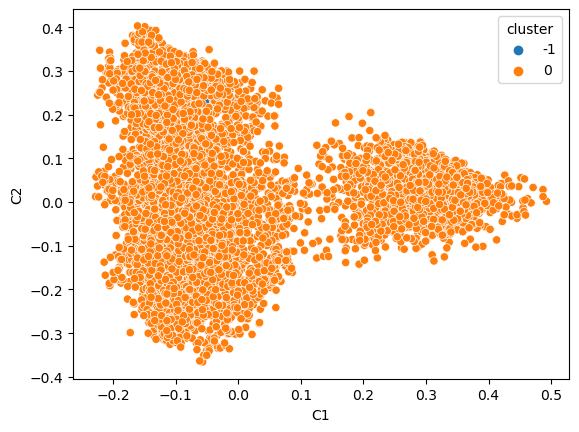

In [65]:
X_pca['cluster'] = pd.Categorical(best_model.labels_)
sns.scatterplot(x = "C1", y = "C2", hue = "cluster", data = X_pca)

In [66]:
db2 = best_model
%store db2

Stored 'db' (DBSCAN)
Stored 'db2' (DBSCAN)
